In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
df = (pd.read_excel("P4 stopp last 13 month.xlsx").drop(index=0)).reset_index()
del df['index']
len(df)  # 52710 rows
df.head()

,Machine,Ordernumber,Article,Atriclenumber,Type,Workshift,Start time,Minutes,Stoptime,Total stoptime,Stopcause,Station,Comment
0,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 11:38:52.559000,31.276667,2023-02-10 12:10:09.178000,00:31:16.600000,Okategoriserat,NaN,NaN
1,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:55:15.469000,7.64,2023-02-10 11:02:53.886000,00:07:38.400000,Okategoriserat,NaN,NaN
2,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:52:52.234000,1.031667,2023-02-10 10:53:54.154000,00:01:01.900000,Mikrostopp,NaN,NaN
3,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:50:05.449000,0.163333,2023-02-10 10:50:15.225000,00:00:09.800000,Mikrostopp,NaN,NaN
4,P4,271237,MINIR POLYAMID 10CM SPECIALBEHANLAD,400501000,Default,Förmiddag,2023-02-10 10:47:58.245000,1.555,2023-02-10 10:49:31.590000,00:01:33.300000,Okategoriserat,NaN,NaN


In [113]:
df['Start time'] = df['Start time'].astype('datetime64')
df['Minutes'] = df['Minutes'].astype('float')
df['Stoptime'] = df['Stoptime'].astype('datetime64')

In [114]:
#check missing value or error value and decide how to revise them 
df = df.replace({'-': None})
df.dtypes
df.isnull().sum()

Machine               0
Ordernumber        1336
Article             369
Atriclenumber       369
Type               1424
Workshift             0
Start time            0
Minutes               0
Stoptime              0
Total stoptime        0
Stopcause             0
Station           44940
Comment           51085
dtype: int64

In [115]:
# Filling missing values with above cells
df = df.fillna(method='ffill')
df.isnull().sum()

Machine             0
Ordernumber         0
Article             0
Atriclenumber       0
Type                0
Workshift           0
Start time          0
Minutes             0
Stoptime            0
Total stoptime      0
Stopcause           0
Station            41
Comment           115
dtype: int64

In [116]:
df.columns

Index(['Machine', 'Ordernumber', 'Article', 'Atriclenumber', 'Type',
       'Workshift', 'Start time', 'Minutes', 'Stoptime', 'Total stoptime',
       'Stopcause', 'Station', 'Comment'],
      dtype='object')

In [117]:
# unique values for column: article, article number, type, workshift, stop cause
df.Machine.unique() # We have just one machine type "P4" and no missing
len(df.Ordernumber.unique())   # 223 order number 
len(df.Article.unique())     # 44 article
len(df.Atriclenumber.unique())  # 46 article number
len(df.Type.unique())  # 2 types which  are 'Default' and 'Roller'
len(df.Workshift.unique())  # 4 shifts  which are Förmiddag', 'Eftermiddag', 'Natt', 'Övertid helg
len(df.Stopcause.unique())  # 46 causes of stop
len(df.Station.unique())   # 44 stations
df['Start time'].dt.year.unique()

array([2023, 2022], dtype=int64)

In [118]:
# count the number of different stops for whole file  & find of the most occurred stops
df['Stopcause'].value_counts()  # as shown above we have 46 stop causes

Mikrostopp                                  38299
Mekaniskt fel                                5941
Väntar på annan maskin                        993
Tömning (Endast påläggsmaskiner)              872
Rast                                          817
Reparatör på plats                            742
Uppstart av maskin                            530
Städning                                      490
Lunch                                         435
Planerad omställning                          336
Påfyllning material                           298
Vision                                        222
Kvalitetsproblem                              186
Förbättringsgrupp                             185
Okategoriserat                                168
Support vid annan maskin                      157
Avslut av order                               151
Väntar på underhåll                           111
Ingen stopporsak                              109
Inställning/justering                          76


In [119]:
# Average time for each stop cause
df.groupby(['Stopcause','Machine'])['Minutes'].mean().unstack()

Machine,P4
Stopcause,
Annan utbildning/möte,23.463186
Avslut av order,18.441280
Elektriskt fel,20.799667
Förbättringsgrupp,32.837505
Företagsinformation,50.909697
Förpacknings-material kvalitet,6.500000
Första / sistabitskontroll / timkontroll,7.392273
IT-infrastruktur (IT/nätverk/ERP/RS),47.407083
Ingen planerad produktion,560.000000


In [120]:
df.groupby(['Stopcause' ,'Workshift'])['Minutes'].sum().unstack()

Workshift,Eftermiddag,Förmiddag,Natt,Övertid helg
Stopcause,,,,
Annan utbildning/möte,145.463333,538.238333,114.046667,NaN
Avslut av order,1096.526667,1292.623333,358.615000,36.868333
Elektriskt fel,38.446667,28.265000,349.281667,NaN
Förbättringsgrupp,705.245000,5369.693333,NaN,NaN
Företagsinformation,277.345000,282.661667,NaN,NaN
Förpacknings-material kvalitet,6.500000,NaN,NaN,NaN
Första / sistabitskontroll / timkontroll,40.966667,40.348333,NaN,NaN
IT-infrastruktur (IT/nätverk/ERP/RS),NaN,189.628333,NaN,NaN
Ingen planerad produktion,560.000000,NaN,NaN,NaN


<AxesSubplot:>

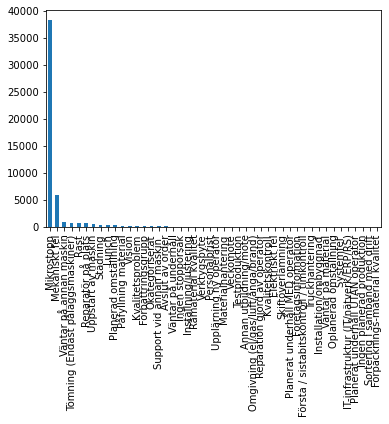

In [121]:
df['Stopcause'].value_counts().plot(kind='bar')